In [ ]:
# Install necessary libraries
!pip install transformers


In [ ]:
!pip install --upgrade urllib3[secure] cryptography


  Using cached urllib3-2.2.0-py3-none-any.whl (120 kB)
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.25.10
    Uninstalling urllib3-1.25.10:
      Successfully uninstalled urllib3-1.25.10


In [ ]:
!pip install urllib3==1.25.10


  Using cached urllib3-1.25.10-py2.py3-none-any.whl (127 kB)
  Attempting uninstall: urllib3
    Found existing installation: urllib3 2.2.0
    Uninstalling urllib3-2.2.0:
      Successfully uninstalled urllib3-2.2.0


In [ ]:
!pip install torch

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import nltk
import os
from nltk.tokenize import word_tokenize, sent_tokenize
from transformers import BertTokenizer, BertModel
import torch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from nltk.stem import PorterStemmer, WordNetLemmatizer


In [ ]:
cancer_data=pd.read_csv('lung_cancer_dataset.csv')
cancer_data.head()

,Patient ID,Age,Gender,Smoking History,Family History,Diagnosis Date,Cancer Stage,Histology Type,Tumor Size,Metastasis,...,Symptom 1,Symptom 2,Symptom 3,Response to Treatment,DFS (months),OS (months),Adverse Events,HRQoL Assessment,Follow-up Appointments,Patient-reported Outcomes
0,P001,70,Male,Smoker,No,20/04/2019,Stage II,Adenocarcinoma,3.93,Brain,...,Loss of appetite,Headaches,Fatigue,Complete Response,60,34,"Diarrhea, Neutropenia, Fatigue, Vomiting, Muco...",Improved,"['2024-04-07', '2025-12-29', '2025-07-05', '20...",Maintaining a positive outlook despite challen...
1,P002,36,Female,Ex-Smoker,No,07/08/2020,Stage I,Small Cell,7.68,Lung,...,Loss of appetite,Persistent infections,Shortness of breath,Partial Response,18,48,"Mucositis, Diarrhea, Fatigue, Hypothyroidism",Stable,"['2028-06-03', '2028-06-07', '2028-04-04', '20...",Having challenges with daily activities due to...
2,P003,72,Female,Non-Smoker,Yes,29/12/2022,Stage II,Small Cell,6.26,Brain,...,Difficulty swallowing,Unexplained weight loss,"Neurological symptoms (e.g., dizziness, weakness)",Progression,53,53,"Neutropenia, Fatigue",Improved,"['2024-02-18', '2026-11-08', '2024-09-07', '20...",Feeling generally unwell and fatigued.
3,P004,77,Female,Non-Smoker,No,21/05/2023,Stage III,Adenocarcinoma,5.39,Brain,...,Headaches,Joint pain,Fatigue,Complete Response,55,70,Pneumonitis,Stable,"['2028-03-04', '2025-12-16', '2024-12-16', '20...",Experiencing side effects from treatment.
4,P005,37,Female,Ex-Smoker,Yes,01/08/2020,Stage IV,Adenocarcinoma,2.51,Liver,...,Difficulty swallowing,"Neurological symptoms (e.g., dizziness, weakness)",Persistent cough,Complete Response,35,43,"Nausea, Anemia, Vomiting",Improved,"['2024-05-11', '2025-10-30', '2024-03-03', '20...",Struggling with the impact of the diagnosis on...


In [ ]:
# Create a new column 'Status' based on the 'metasis' column
cancer_data['Status'] = cancer_data['Metastasis'].apply(lambda x: 'Yes' if x == 'lung' else 'No')

# Save the updated dataset
cancer_data.to_csv('lung_cancer_dataset_update.csv', index=False)


In [ ]:
!pip install urllib3

In [ ]:
cancer_data.isna().sum()

Patient ID                       0
Age                              0
Gender                           0
Smoking History                  0
Family History                   0
Diagnosis Date                   0
Cancer Stage                     0
Histology Type                   0
Tumor Size                       0
Metastasis                       0
Treatment Type                   0
Geneset                          0
Genetic Mutations                0
Blood Markers                    0
IHC Results                      0
Radiation Therapy Details        0
Chemotherapy Regimen             0
Clinical Trial Participation     0
Comorbidities                   29
ECOG Performance Status          0
Symptom 1                        0
Symptom 2                        0
Symptom 3                        0
Response to Treatment            0
DFS (months)                     0
OS (months)                      0
Adverse Events                  14
HRQoL Assessment                 0
Follow-up Appointmen

In [ ]:
cancer_data.shape

(200, 30)

In [ ]:
cancer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Patient ID                    200 non-null    object 
 1   Age                           200 non-null    int64  
 2   Gender                        200 non-null    object 
 3   Smoking History               200 non-null    object 
 4   Family History                200 non-null    object 
 5   Diagnosis Date                200 non-null    object 
 6   Cancer Stage                  200 non-null    object 
 7   Histology Type                200 non-null    object 
 8   Tumor Size                    200 non-null    float64
 9   Metastasis                    200 non-null    object 
 10  Treatment Type                200 non-null    object 
 11  Geneset                       200 non-null    object 
 12  Genetic Mutations             200 non-null    object 
 13  Blood

In [ ]:
cancer_data=cancer_data.dropna()

In [ ]:
cancer_data.shape

(158, 30)

In [ ]:
!pip install --upgrade transformers


In [ ]:
 import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
# Sample Medical Transcript
user_inputs = []
while True:
    user_input = input("Enter a user input (or 'quit' to stop): ")
    if user_input.lower() == "quit":
        break
    user_inputs.append(user_input)
for i in user_inputs:
    # Tokenize using NLTK
    tokens = word_tokenize(i)
    tokenizer = word_tokenize
# Output the tokens
print(tokens)


Enter a user input (or 'quit' to stop):  XYZ is a 54-year-old African American male, who presents to the ED with a complaint of a two-week history of hoarseness that is not getting better. When questioned further, he admits that his usual morning "smoker's cough" is getting worse and that he has "given serious thought lately to quitting smoking in the near  future."  PMH:  Hypothyroidism 27 years  • Bilateral osteoarthritis of knees 8 years  • Depression 2 years  Iron deficiency anemia of unknown cause, 8 months  Seasonal allergic rhinitis since adolescence  Several episodes of mildly bloody sputum in past year that resolved in a few days; patient  did not seek medical help  No prior history of trauma or surgeries  • Had influenza vaccine last year  Last tetanus booster, 6 years ago.  Family history is negative for lung cancer; however, there is a positive family history for other types of cancer-paternal uncle with colorectal cancer, one niece with non-Hodgkin's lymphoma, and one niec

In [ ]:
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
lemmatizer=WordNetLemmatizer()

In [ ]:
from nltk.corpus import wordnet
def get_simple_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [ ]:
 nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords
import string
stops=set(stopwords.words('english'))
punctuations=list(string.punctuation)
stops.update(punctuations)
stops,string.punctuation

({'!',
  '"',
  '#',
  '$',
  '%',
  '&',
  "'",
  '(',
  ')',
  '*',
  '+',
  ',',
  '-',
  '.',
  '/',
  ':',
  ';',
  '<',
  '=',
  '>',
  '?',
  '@',
  '[',
  '\\',
  ']',
  '^',
  '_',
  '`',
  'a',
  'about',
  'above',
  'after',
  'again',
  'against',
  'ain',
  'all',
  'am',
  'an',
  'and',
  'any',
  'are',
  'aren',
  "aren't",
  'as',
  'at',
  'be',
  'because',
  'been',
  'before',
  'being',
  'below',
  'between',
  'both',
  'but',
  'by',
  'can',
  'couldn',
  "couldn't",
  'd',
  'did',
  'didn',
  "didn't",
  'do',
  'does',
  'doesn',
  "doesn't",
  'doing',
  'don',
  "don't",
  'down',
  'during',
  'each',
  'few',
  'for',
  'from',
  'further',
  'had',
  'hadn',
  "hadn't",
  'has',
  'hasn',
  "hasn't",
  'have',
  'haven',
  "haven't",
  'having',
  'he',
  'her',
  'here',
  'hers',
  'herself',
  'him',
  'himself',
  'his',
  'how',
  'i',
  'if',
  'in',
  'into',
  'is',
  'isn',
  "isn't",
  'it',
  "it's",
  'its',
  'itself',
  'just',
  'll',


In [ ]:
# Choose stemming or lemmatization based on your preference
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def normalize_text(text, stem=True):
    """
    Normalizes text by tokenizing, removing stop words, and applying stemming/lemmatization.
    """
    tokens = tokenizer(text.lower())
    filtered_tokens = [token for token in tokens if token not in stops]
    if stem:
        normalized_tokens = [stemmer.stem(token) for token in filtered_tokens]
    else:
        normalized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]
    return " ".join(normalized_tokens)


In [ ]:
def clean_reviews(words):
    output_reviews=[]
    for w in words:
        if w.lower() not in stops:
            pos=pos_tag([w])
            #lemmatize the word
            clean_review=lemmatizer.lemmatize(w,pos=get_simple_pos(pos[0][1]))
            output_reviews.append(clean_review.lower())
    return output_reviews

In [ ]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
medical_transcript=clean_reviews(tokens)
medical_transcript

['xyz',
 '54-year-old',
 'african',
 'american',
 'male',
 'present',
 'ed',
 'complaint',
 'two-week',
 'history',
 'hoarseness',
 'get',
 'well',
 'question',
 'admits',
 'usual',
 'morning',
 '``',
 'smoker',
 "'s",
 'cough',
 "''",
 'get',
 'bad',
 '``',
 'give',
 'serious',
 'thought',
 'lately',
 'quit',
 'smoking',
 'near',
 'future',
 "''",
 'pmh',
 'hypothyroidism',
 '27',
 'year',
 '•',
 'bilateral',
 'osteoarthritis',
 'knee',
 '8',
 'year',
 '•',
 'depression',
 '2',
 'year',
 'iron',
 'deficiency',
 'anemia',
 'unknown',
 'cause',
 '8',
 'month',
 'seasonal',
 'allergic',
 'rhinitis',
 'since',
 'adolescence',
 'several',
 'episode',
 'mildly',
 'bloody',
 'sputum',
 'past',
 'year',
 'resolve',
 'day',
 'patient',
 'seek',
 'medical',
 'help',
 'prior',
 'history',
 'trauma',
 'surgery',
 '•',
 'influenza',
 'vaccine',
 'last',
 'year',
 'last',
 'tetanus',
 'booster',
 '6',
 'year',
 'ago',
 'family',
 'history',
 'negative',
 'lung',
 'cancer',
 'however',
 'positive',


In [ ]:
cancer_data["Symptom1"]=cancer_data["Symptom 1"]+" "+cancer_data["Symptom 2"]+" "+cancer_data["Symptom 3"]
cancer_data["Symptom1"][2]

'Difficulty swallowing Unexplained weight loss Neurological symptoms (e.g., dizziness, weakness)'

In [ ]:
# Combine relevant text columns into a single 'symptoms' column
numeric_features = ['Age', 'Tumor Size',"ECOG Performance Status"]
textual_feature = 'medical_transcript'
text_columns = ['Geneset', 'Genetic Mutations', 'Gender', 'Smoking History',"Symptom 1","Symptom 2","Symptom 3",'Cancer Stage', 'Histology Type','Metastasis','Treatment Type',"Comorbidities","Clinical Trial Participation","IHC Results","Blood Markers","Family History"]
cancer_data['symptoms'] = cancer_data[text_columns].apply(lambda x: ' '.join(x), axis=1)

In [ ]:
cancer_data['symptoms']

0      KRAS, HER2, PIK3CA KRAS G12V, HER2 HER2 Amplif...
2      CDKN2A, ATM, BCL2 CDKN2A CDKN2A Mutation, ATM ...
3      RET, KRAS, EGFR RET RET Fusion, KRAS G12V, EGF...
5      FGFR2, DDR2, SOX2 FGFR2 FGFR2 Amplification, D...
6      ERBB2, BRAF, PIK3CA ERBB2 HER2 Amplification, ...
                             ...                        
195    DDR2, FGFR2, NOTCH1 DDR2 DDR2 Mutation, FGFR2 ...
196    CDKN2A, NOTCH1, FGFR1 CDKN2A CDKN2A Mutation, ...
197    RET, KRAS, MET RET RET Fusion, KRAS G12V, MET ...
198    BRAF, ERBB2, PIK3CA BRAF D594G, ERBB2 HER2 Amp...
199    DDR2, FGFR1, NOTCH1 DDR2 DDR2 Mutation, FGFR1 ...
Name: symptoms, Length: 158, dtype: object

In [ ]:
cancer_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158 entries, 0 to 199
Data columns (total 32 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Patient ID                    158 non-null    object 
 1   Age                           158 non-null    int64  
 2   Gender                        158 non-null    object 
 3   Smoking History               158 non-null    object 
 4   Family History                158 non-null    object 
 5   Diagnosis Date                158 non-null    object 
 6   Cancer Stage                  158 non-null    object 
 7   Histology Type                158 non-null    object 
 8   Tumor Size                    158 non-null    float64
 9   Metastasis                    158 non-null    object 
 10  Treatment Type                158 non-null    object 
 11  Geneset                       158 non-null    object 
 12  Genetic Mutations             158 non-null    object 
 13  Blood

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
# Assuming your target variables include 'Geneset', 'Genetic Mutations', 'Cancer Stage', 'Histology Type', and 'Metastasis'
target_columns = ['Geneset', 'Genetic Mutations', 'Cancer Stage', 'Histology Type', 'Metastasis']

# Features (excluding the target columns)
# Assuming your target variable is 'lung_cancer_status'
# Features (excluding the target columns)
X = cancer_data.drop(target_columns + ['Patient ID', 'Diagnosis Date', 'Chemotherapy Regimen', 'HRQoL Assessment',
                                       'Symptom1', 'symptoms', 'Follow-up Appointments', 'Adverse Events',
                                       'Radiation Therapy Details', 'Response to Treatment', 'DFS (months)', 'OS (months)'],
                    axis=1) # Features
y = cancer_data[target_columns]  # Target variable

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Data Preprocessing for Gene and Transcript Data
# (Assuming you have numerical features in the gene and transcript data)
numeric_features = ['Age', 'Tumor Size', "ECOG Performance Status"]

# Standardize numerical features using StandardScaler
scaler = StandardScaler()
X_train[numeric_features] = scaler.fit_transform(X_train[numeric_features])
X_test[numeric_features] = scaler.transform(X_test[numeric_features])

# Data Preprocessing for Medical Transcript Data
# (Assuming you have categorical features in the medical transcript data)
text_columns = ['Gender', 'Smoking History', "Symptom 1", "Symptom 2", "Symptom 3",
                'Treatment Type', "Comorbidities", "Clinical Trial Participation",
                "IHC Results", "Blood Markers", "Family History","Patient-reported Outcomes"]


# Encode categorical features using LabelEncoder
label_encoder = LabelEncoder()

for feature in text_columns:
    # Fit and transform the training set
    X_train[feature] = label_encoder.fit_transform(X_train[feature])

    # Handle unknown labels in the test set
    X_test[feature] = X_test[feature].map(
        lambda s: label_encoder.transform([s])[0] if s in label_encoder.classes_ else -1
    )
for feature in target_columns:
    # Fit and transform the training set
    y_train[feature] = label_encoder.fit_transform(y_train[feature])

    # Handle unknown labels in the test set
    y_test[feature] = y_test[feature].map(
        lambda s: label_encoder.transform([s])[0] if s in label_encoder.classes_ else -1
    )

# Display the preprocessed data
# Display the preprocessed data
print("X_train:", X_train.head())
print("y_train:", y_train.head())
print("X_test:", X_test.head())
print("y_test:", y_test.head())


X_train:           Age  Gender  Smoking History  Family History  Tumor Size  \
171 -0.425161       0                1               1   -1.565853   
71  -0.808719       0                0               0   -0.934142   
159  0.853366       0                0               1    0.907459   
105 -1.320130       0                1               0   -0.757476   
196 -0.744793       0                1               0    0.902106   

     Treatment Type  Blood Markers  IHC Results  Clinical Trial Participation  \
171               0            102           38                             0   
71                0             60           98                             0   
159               1             77           52                             1   
105               2             65           49                             0   
196               1             36           19                             0   

     Comorbidities  ECOG Performance Status  Symptom 1  Symptom 2  Symptom 3  \
171

In [ ]:
import ssl
print(ssl.OPENSSL_VERSION)


OpenSSL 3.0.2 15 Mar 2022


In [ ]:
pip install --upgrade tensorflow


In [ ]:
!pip install keras


In [ ]:
print(X_train.dtypes)
print("y_train shape", y_train.dtypes)


Age                             float64
Gender                            int64
Smoking History                   int64
Family History                    int64
Tumor Size                      float64
Treatment Type                    int64
Blood Markers                     int64
IHC Results                       int64
Clinical Trial Participation      int64
Comorbidities                     int64
ECOG Performance Status         float64
Symptom 1                         int64
Symptom 2                         int64
Symptom 3                         int64
Patient-reported Outcomes         int64
dtype: object
y_train shape Geneset              int64
Genetic Mutations    int64
Cancer Stage         int64
Histology Type       int64
Metastasis           int64
dtype: object


In [ ]:
# Check the shape of X_train
print("Shape of X_train:", X_train.shape)

# Check the shape of y_train
print("Shape of y_train:", y_train.shape)
y_train = np.array(y_train)
print("numpy array of y_train :",y_train)
# Print unique values in y_train
print("Unique values in y_train:", np.unique(y_train))



Shape of X_train: (126, 15)
Shape of y_train: (126, 5)
numpy array of y_train : [[ 38  38   0   2   3]
 [ 98  98   3   0   1]
 [ 52  55   1   1   0]
 [ 49  49   1   1   3]
 [ 19  19   3   2   0]
 [ 39  39   1   2   3]
 [ 50  54   0   1   3]
 [ 34  34   1   2   3]
 [ 66  66   1   2   3]
 [ 37  37   2   2   1]
 [ 11  11   1   1   0]
 [113 113   3   1   3]
 [ 83  83   0   2   0]
 [119 119   2   1   0]
 [  0   0   3   0   2]
 [120 120   1   1   1]
 [ 63  63   0   1   3]
 [ 55  52   0   0   2]
 [100 100   3   0   1]
 [ 13  13   3   0   3]
 [112 112   0   1   2]
 [ 91  91   3   1   0]
 [121 121   2   1   3]
 [116 116   1   1   3]
 [ 23  23   1   2   0]
 [ 31  31   3   0   3]
 [105 105   3   1   3]
 [ 17  17   1   1   3]
 [106 106   2   2   2]
 [ 12  12   1   0   3]
 [ 99  99   3   0   3]
 [ 89  89   3   1   0]
 [104 104   3   1   0]
 [ 29  29   2   2   0]
 [ 81  81   3   1   0]
 [ 51  50   1   0   0]
 [ 47  47   1   1   2]
 [  4   4   2   1   0]
 [ 60  60   2   0   2]
 [ 16  16   2   2   3]


In [ ]:
num_classes = len(np.unique(y_train))
num_classes

124

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 128)               2048      
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_13 (Dense)            (None, 64)                8256      
                                                                 
 dense_14 (Dense)            (None, 1)                 65        
                                                                 
Total params: 10369 (40.50 KB)
Trainable params: 10369 (40.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
4/4 [==============================] - 2s 125ms/step - loss: 1820.4564 - mse: 1820.4564 - val_loss: 1159.4764 - val_mse: 1159.4764
Epoch 2/

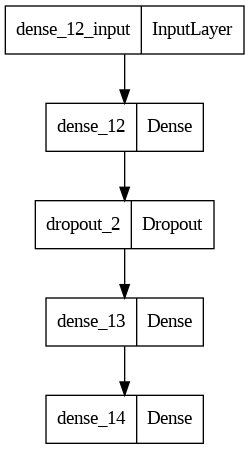

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import numpy as np

# Assuming y_train is numeric
# Convert y_train to NumPy array
y_train = np.array(y_train)

# Modify the last layer of your model for regression
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='linear'))  # Use 'linear' activation for regression

# Compile the model with 'mean_squared_error' loss for regression
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])

# Display the model summary
model.summary()

# Train the DNN model using the training dataset
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)
plot_model(model)


In [ ]:
# Tokenize and normalize symptoms
from sklearn.feature_extraction.text import TfidfVectorizer

def normalize_symptoms(text):
    tokens = text.lower().split()
    filtered_tokens = [token for token in tokens if token not in stops]
    normalized_tokens = [stemmer.stem(token) for token in filtered_tokens]
    return " ".join(normalized_tokens)

cancer_data['normalized_symptoms'] = cancer_data['symptoms'].apply(normalize_symptoms)
print(cancer_data['normalized_symptoms'][0])
# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(cancer_data['normalized_symptoms'])
print(tfidf_matrix)
tfidf_matrix.shape


kras, her2, pik3ca kra g12v, her2 her2 amplification, pik3ca e545k male smoker loss appetit headach fatigu stage ii adenocarcinoma brain radiat asthma, obesity, copd ye posit kras, posit her2, posit pik3ca cea, cyfra 21-1, nse, ca 19-9, ca-125
  (0, 0)	0.06973749259651144
  (0, 1)	0.06928664960255548
  (0, 16)	0.11815112642317922
  (0, 84)	0.07204910624823202
  (0, 2)	0.07300177573088143
  (0, 28)	0.07300177573088143
  (0, 18)	0.07446258535599112
  (0, 90)	0.16433134363227292
  (0, 115)	0.0734843966021864
  (0, 26)	0.0859504709038435
  (0, 86)	0.10130460375602664
  (0, 8)	0.08718146910298455
  (0, 92)	0.11599933087777788
  (0, 14)	0.12640937108153819
  (0, 3)	0.12153708445160365
  (0, 61)	0.12271513231840107
  (0, 103)	0.05477711454409097
  (0, 47)	0.14798631125912368
  (0, 55)	0.14090846544340307
  (0, 7)	0.14612928207976247
  (0, 71)	0.10725525210800131
  (0, 100)	0.11292691173831666
  (0, 73)	0.0952119844013546
  (0, 39)	0.1583524419498762
  (0, 6)	0.08844076857609234
  :	:
  (157, 

(158, 116)

In [ ]:
# Gather user inputs
tfidf_features = vectorizer.transform(medical_transcript)
tfidf_features.shape

(240, 116)

In [ ]:
!pip install transformers

In [ ]:
!pip install --upgrade transformers


In [ ]:
from transformers import AutoTokenizer, AutoModel

# Load pre-trained BioBERT model and tokenizer
tokenizer = AutoTokenizer.from_pretrained("monologg/biobert_v1.1_pubmed")
model_bert = AutoModel.from_pretrained("monologg/biobert_v1.1_pubmed")

# Tokenize user input
tokenized_user_input = tokenizer(user_inputs, is_split_into_words=True, padding=True, truncation=True, return_tensors="pt")

print(tokenized_user_input)
# Get word embeddings
with torch.no_grad():
    outputs = model_bert(**tokenized_user_input)
    word_embeddings = outputs.last_hidden_state.numpy()
word_embeddings.shape,word_embeddings

{'input_ids': tensor([[  101,   161,  3663,  5301,  1110,   170,  4335,   118,  1214,   118,
          1385,  2170,  1237,  2581,   117,  1150,  8218,  1106,  1103,   142,
          2137,  1114,   170, 12522,  1104,   170,  1160,   118,  1989,  1607,
          1104, 23523,  1757,  1115,  1110,  1136,  2033,  1618,   119,  1332,
          8449,  1748,   117,  1119, 15077,  1115,  1117,  4400,  2106,   107,
          5427,  1197,   112,   188, 21810,   107,  1110,  2033,  4146,  1105,
          1115,  1119,  1144,   107,  1549,  3021,  1354, 10634,  1106,  8204,
          1916,  9987,  1107,  1103,  1485,  2174,   119,   107, 14123,  3048,
           131,   145,  1183, 11439,  7889, 16219,  1863,  1765,  1201,   794,
           139,  8009, 16719,   184, 13894, 19243,  1582,  7729,  1548,  1104,
          4257,   129,  1201,   794, 11442,   123,  1201,  5621, 21344,  1126,
         20504,  1104,  3655,  2612,   117,   129,  1808,  5623,  1348,  1155,
         26949,   187,  8265, 10721,  

((1, 512, 768),
 array([[[ 0.13340041, -0.18021484, -0.01995244, ..., -0.3992377 ,
           0.40593195,  0.23974453],
         [ 0.16174823,  0.13074839,  0.3286853 , ...,  0.25804546,
           0.47434872,  0.38249442],
         [-0.15071228, -0.01017828,  0.32045144, ..., -0.15462714,
           0.5457453 ,  0.16764736],
         ...,
         [ 0.066678  , -0.44299027, -0.04651878, ...,  0.07975804,
          -0.04494012,  0.40034252],
         [ 0.18047811, -0.26731426,  0.10754836, ..., -0.10295236,
           0.3808272 ,  0.01888821],
         [ 0.88260156, -0.08736797, -0.24062122, ..., -0.5297994 ,
           0.5909216 , -0.3674566 ]]], dtype=float32))

In [ ]:
# Load a model with NER capabilities (e.g., en_core_web_sm for general English)
import spacy
from spacy import displacy
nlp = spacy.load("en_core_web_sm")
all_entities = []
for user_input in user_inputs:
    doc = nlp(user_input)
    ## Render output by using displacy module
    displacy.render(doc, style="dep")
    # Extract entities and their labels
    entities = [(entity.text, entity.label_) for entity in doc.ents]
    all_entities.extend(entities)
print(all_entities)

entity_types = [entity[1] for entity in all_entities]
encoder = OneHotEncoder(handle_unknown='ignore')
entities_features = encoder.fit_transform(np.array(entity_types).reshape(-1, 1)).toarray()
print(entities_features.shape)
print(entities_features)

[('XYZ', 'ORG'), ('54-year-old', 'DATE'), ('African American', 'NORP'), ('two-week', 'DATE'), ('PMH', 'ORG'), ('27 years', 'DATE'), ('• Bilateral', 'PRODUCT'), ('8 years', 'DATE'), ('• Depression 2 years', 'EVENT'), ('8 months  Seasonal', 'DATE'), ('past year', 'DATE'), ('a few days', 'DATE'), ('• Had', 'PRODUCT'), ('last year', 'DATE'), ('6 years ago', 'DATE'), ('one', 'CARDINAL'), ("non-Hodgkin's", 'ORG'), ('• Patient', 'ORG'), ('eight', 'CARDINAL'), ('• Wheeze', 'PRODUCT'), ('• Percussion', 'ORG'), ('• Apical', 'ORG'), ('5th', 'ORDINAL'), ('Normal S1', 'PERSON'), ('S2', 'CARDINAL'), ('S3', 'PRODUCT'), ('S4', 'PRODUCT')]
(27, 8)
[[0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0.

In [ ]:
import spacy
from spacy import displacy
from sklearn.preprocessing import OneHotEncoder
import numpy as np

# Load a model with NER capabilities (e.g., en_core_web_sm for general English)
nlp = spacy.load("en_core_web_sm")


# Extract entities and their labels for each user input
all_entities = []
for user_input in medical_transcript:
    doc = nlp(user_input)
    # Render output using displacy module (dependency visualization)
    displacy.render(doc, style="dep")

    # Extract entities and their labels
    entities = [(entity.text, entity.label_) for entity in doc.ents]
    all_entities.extend(entities)

# Print all entities
print("All entities:", all_entities)

# Extract entity types
entity_types = [entity[1] for entity in all_entities]

# Reshape entity types before using OneHotEncoder
entity_types_reshaped = np.array(entity_types).reshape(-1, 1)

# Initialize OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore')

# Fit and transform entity types
entities_features = encoder.fit_transform(entity_types_reshaped).toarray()

# Print the shape and features
print("Shape of entities features:", entities_features.shape)
print("Entities features:")
print(entities_features)


All entities: [('54-year-old', 'DATE'), ('african', 'NORP'), ('american', 'NORP'), ('two-week', 'DATE'), ('morning', 'TIME'), ('27', 'CARDINAL'), ('8', 'CARDINAL'), ('2', 'CARDINAL'), ('8', 'CARDINAL'), ('6', 'CARDINAL'), ('one', 'CARDINAL'), ('lymphoma', 'GPE'), ('one', 'CARDINAL'), ('worsen', 'PERSON'), ('one', 'CARDINAL'), ('eight', 'CARDINAL'), ('bladder', 'ORG'), ('5th', 'ORDINAL'), ('correspond', 'PERSON'), ('auscultation', 'ORG'), ('node', 'GPE'), ('node', 'GPE'), ('node', 'GPE')]
Shape of entities features: (23, 8)
Entities features:
[[0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 

In [ ]:
import collections
from nltk import flatten
tokens_df= cancer_data['Geneset'] #drop null values
# Get top 30 tokens based upon frequency in whole corpus
word_freq_top30 = pd.DataFrame(collections.Counter(flatten(tokens_df.to_list())).most_common(30),columns=['words',"frequency"])

<ipython-input-112-c69bb449379e>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation=75)


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28],
 [Text(0, 0, 'DDR2, FGFR1, NOTCH1'),
  Text(1, 0, 'PIK3CA, EGFR, ALK'),
  Text(2, 0, 'KRAS, HER2, PIK3CA'),
  Text(3, 0, 'CDKN2A, ATM, BCL2'),
  Text(4, 0, 'RET, KRAS, EGFR'),
  Text(5, 0, 'FGFR2, DDR2, SOX2'),
  Text(6, 0, 'ERBB2, BRAF, PIK3CA'),
  Text(7, 0, 'TP53, FGFR1, CDKN2A'),
  Text(8, 0, 'DDR2, TP53, EGFR'),
  Text(9, 0, 'KRAS, RB1, BCL2'),
  Text(10, 0, 'SOX2, FGFR1, PIK3CA'),
  Text(11, 0, 'ROS1, MET, ALK'),
  Text(12, 0, 'SMARCA1, BCL2, ATM'),
  Text(13, 0, 'KRAS, RET, ERBB2'),
  Text(14, 0, 'MET, ROS1, PIK3CA'),
  Text(15, 0, 'TP53, CDKN2A, PIK3CA'),
  Text(16, 0, 'FGFR1, EGFR, NOTCH1'),
  Text(17, 0, 'NOTCH1, SOX2, PTEN'),
  Text(18, 0, 'RB1, SMARCA1, BCL2'),
  Text(19, 0, 'SMARCA1, RB1, TP53'),
  Text(20, 0, 'TP53, FGFR1, SOX2'),
  Text(21, 0, 'RET, KRAS, PIK3CA'),
  Text(22, 0, 'KIT, BCL2, MYC'),
  Text(23, 

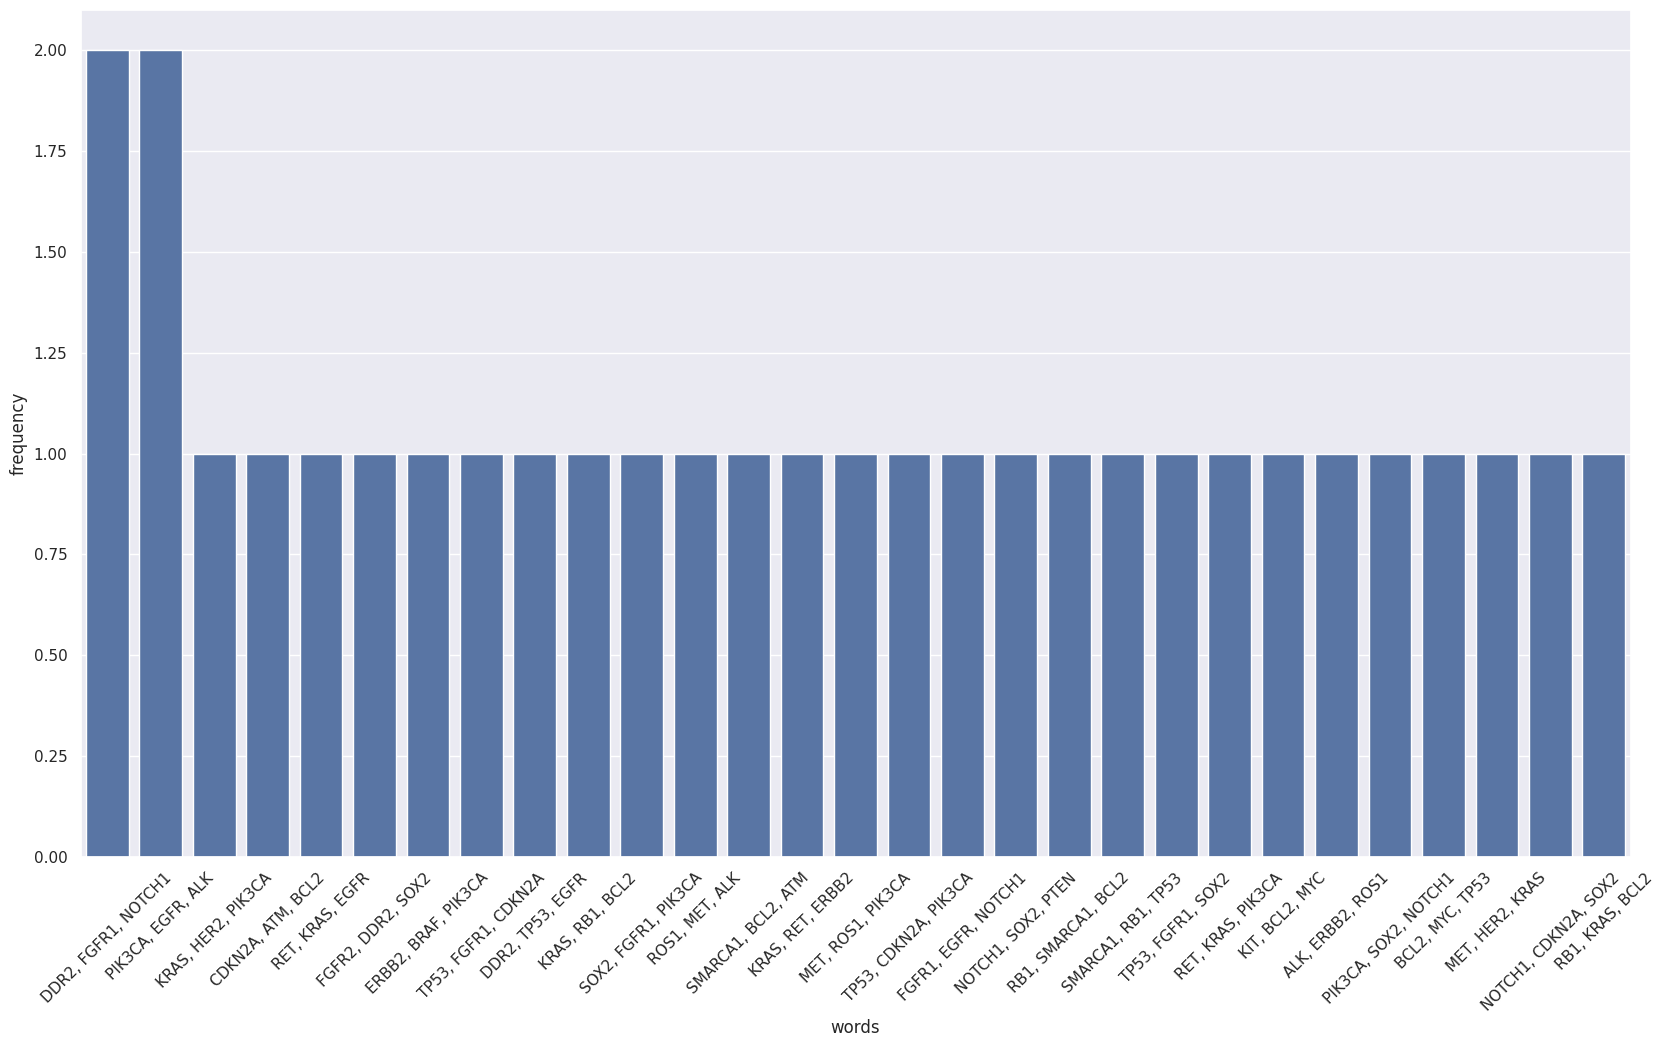

In [ ]:
##Plot bar graph of words wrt frequency
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")
sns.set(rc={'figure.figsize':(20,11)})
ax = sns.barplot(x=word_freq_top30['words'][1:], y=word_freq_top30['frequency'])
ax.set_xticklabels(ax.get_xticklabels(),rotation=75)
plt.xticks(rotation=45)

In [ ]:
# Combine the outputs from DNN and BioBERT
from tensorflow.keras.layers import Concatenate
from tensorflow.keras.layers import Reshape

# Reshape model.output to have the same dimensions as word_embeddings
reshaped_dnn_output = Reshape((1, 1))(model.output)
print(reshaped_dnn_output.shape)
print(word_embeddings.shape)

(None, 1, 1)
(1, 512, 768)


(None, 512, 1)
(None, 512, 1)
(1, 512, 769)
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 512, 64)           49280     
                                                                 
 dense_11 (Dense)            (None, 512, 1)            65        
                                                                 
Total params: 49345 (192.75 KB)
Trainable params: 49345 (192.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


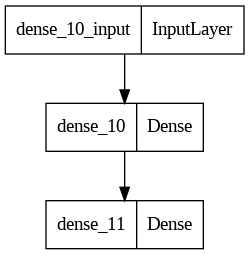

In [ ]:
# Combine the outputs from DNN and BioBERT
from tensorflow.keras.layers import Concatenate, RepeatVector, Input, Reshape
from tensorflow.keras.utils import plot_model

input_shape = (10, 769)  # Adjust the size based on your actual input shapes

# Create an Input layer with the specified input shape
input_layer = Input(shape=input_shape)

# Repeat the vector to match the word_embeddings shape
reshaped_dnn_output = RepeatVector(512)(model.output)
print(reshaped_dnn_output.shape)  # Output: (None, 512, 1)

# Reshape to desired output
reshaped_dnn_output = Reshape((512, 1))(reshaped_dnn_output)
print(reshaped_dnn_output.shape)  # Output: (None, 512, 1)

# Now both reshaped_dnn_output and word_embeddings have compatible shapes
combined_features = Concatenate(axis=-1)([reshaped_dnn_output, word_embeddings])
print(combined_features.shape)

# Add a dense layer for further processing or prediction
combined_model = Sequential()
combined_model.add(Dense(64, activation='relu', input_shape=(512, 769)))  # Adjust input shape based on the combined_features.shape
combined_model.add(Dense(1, activation='linear'))  # Adjust activation based on the task (regression)

# Compile the combined model
combined_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])

# Display the combined model summary
combined_model.summary()
plot_model(combined_model)


In [ ]:
combined_features.shape

TensorShape([1, 512, 769])

In [ ]:
print(type(combined_features))

<class 'keras.src.engine.keras_tensor.KerasTensor'>


In [ ]:
import tensorflow as tf
print(tf.__version__)


2.15.0


In [ ]:
cancer_data.columns

Index(['Patient ID', 'Age', 'Gender', 'Smoking History', 'Family History',
       'Diagnosis Date', 'Cancer Stage', 'Histology Type', 'Tumor Size',
       'Metastasis', 'Treatment Type', 'Geneset', 'Genetic Mutations',
       'Blood Markers', 'IHC Results', 'Radiation Therapy Details',
       'Chemotherapy Regimen', 'Clinical Trial Participation', 'Comorbidities',
       'ECOG Performance Status', 'Symptom 1', 'Symptom 2', 'Symptom 3',
       'Response to Treatment', 'DFS (months)', 'OS (months)',
       'Adverse Events', 'HRQoL Assessment', 'Follow-up Appointments',
       'Patient-reported Outcomes', 'Symptom1', 'symptoms',
       'normalized_symptoms'],
      dtype='object')

In [ ]:
import spacy
from spacy import displacy
from sklearn.preprocessing import OneHotEncoder
import numpy as np

# Load a model with NER capabilities (e.g., en_core_web_sm for general English)
nlp = spacy.load("en_core_web_sm")

# List of user inputs (assuming you have it defined somewhere)
user_inputs = ["Your first user input", "Your second user input"]

# Extract entities and their labels for each user input
gene_feature = []
genetic_feature=[]
histology_feature=[]
cancer_stage_feature=[]
metasis_feature=[]

for user_input in cancer_data['Geneset']:
  doc = nlp(user_input)
  # Render output using displacy module (dependency visualization)
  displacy.render(doc, style="dep")
  # Extract entities and their labels
  entities = [(entity.text, entity.label_) for entity in doc.ents]
  gene_feature.extend(entities)

# Print all entities
print("All entities:", gene_feature)

# Extract entity types
gene_feature_type = [entity[1] for entity in gene_feature]

# Reshape entity types before using OneHotEncoder
gene_feature_type_reshaped = np.array(gene_feature_type).reshape(-1, 1)

# Initialize OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore')

# Fit and transform entity types
gene_features = encoder.fit_transform(gene_feature_type_reshaped).toarray()

# Print the shape and features
print("Shape of entities features:", gene_features.shape)
print("Entities features:")
print(gene_features)

for user_input in cancer_data['Genetic Mutations']:
  doc = nlp(user_input)
  # Render output using displacy module (dependency visualization)
  displacy.render(doc, style="dep")
  # Extract entities and their labels
  entities = [(entity.text, entity.label_) for entity in doc.ents]
  genetic_feature.extend(entities)

# Print all entities
print("All entities:", genetic_feature)

# Extract entity types
genetic_feature_type = [entity[1] for entity in gene_feature]

# Reshape entity types before using OneHotEncoder
genetic_feature_type_reshaped = np.array(genetic_feature_type).reshape(-1, 1)

# Initialize OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore')

# Fit and transform entity types
genetic_features = encoder.fit_transform(genetic_feature_type_reshaped).toarray()

# Print the shape and features
print("Shape of entities features:", genetic_features.shape)
print("Entities features:")
print(genetic_features)

for user_input in cancer_data['Histology Type']:
  doc = nlp(user_input)
  # Render output using displacy module (dependency visualization)
  displacy.render(doc, style="dep")
  # Extract entities and their labels
  entities = [(entity.text, entity.label_) for entity in doc.ents]
  histology_feature.extend(entities)

# Print all entities
print("All entities:", histology_feature)

# Extract entity types
histology_feature_type = [entity[1] for entity in gene_feature]

# Reshape entity types before using OneHotEncoder
histology_feature_type_reshaped = np.array(histology_feature_type).reshape(-1, 1)

# Initialize OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore')

# Fit and transform entity types
histology_feature = encoder.fit_transform(histology_feature_type_reshaped).toarray()

# Print the shape and features
print("Shape of entities features:", histology_feature.shape)
print("Entities features:")
print(histology_feature)

for user_input in cancer_data['Cancer Stage']:
  doc = nlp(user_input)
  # Render output using displacy module (dependency visualization)
  displacy.render(doc, style="dep")
  # Extract entities and their labels
  entities = [(entity.text, entity.label_) for entity in doc.ents]
  cancer_stage_feature.extend(entities)

# Print all entities
print("All entities:", cancer_stage_feature)

# Extract entity types
cancer_stage_feature_type = [entity[1] for entity in cancer_stage_feature]

# Reshape entity types before using OneHotEncoder
cancer_stage_feature_type_reshaped = np.array(cancer_stage_feature_type).reshape(-1, 1)

# Initialize OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore')

# Fit and transform entity types
cancer_stage_features = encoder.fit_transform(cancer_stage_feature_type_reshaped).toarray()

# Print the shape and features
print("Shape of entities features:", cancer_stage_features.shape)
print("Entities features:")
print(cancer_stage_features)

for user_input in cancer_data['Metastasis']:
  doc = nlp(user_input)
  # Render output using displacy module (dependency visualization)
  displacy.render(doc, style="dep")
  # Extract entities and their labels
  entities = [(entity.text, entity.label_) for entity in doc.ents]
  metasis_feature.extend(entities)

# Print all entities
print("All entities:", metasis_feature)

# Extract entity types
metasis_feature_type = [entity[1] for entity in cancer_stage_feature]

# Reshape entity types before using OneHotEncoder
metasis_feature_type_reshaped = np.array(metasis_feature_type).reshape(-1, 1)

# Initialize OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore')

# Fit and transform entity types
metasis_feature = encoder.fit_transform(metasis_feature_type_reshaped).toarray()

# Print the shape and features
print("Shape of entities features:", metasis_feature.shape)
print("Entities features:")
print(metasis_feature)

All entities: [('KRAS', 'ORG'), ('HER2', 'GPE'), ('ATM', 'ORG'), ('RET', 'ORG'), ('KRAS', 'ORG'), ('EGFR', 'PERSON'), ('ERBB2', 'ORG'), ('BRAF', 'ORG'), ('FGFR1', 'ORG'), ('EGFR', 'PERSON'), ('KRAS', 'ORG'), ('FGFR1', 'PRODUCT'), ('ROS1', 'ORDINAL'), ('MET', 'ORG'), ('ALK', 'ORG'), ('SMARCA1', 'ORG'), ('ATM', 'ORG'), ('KRAS', 'ORG'), ('RET', 'ORG'), ('ERBB2', 'PERSON'), ('MET', 'ORG'), ('ROS1', 'GPE'), ('FGFR1', 'ORG'), ('EGFR', 'ORG'), ('NOTCH1', 'PRODUCT'), ('PTEN', 'ORG'), ('ERBB2', 'GPE'), ('SMARCA1', 'PERSON'), ('SMARCA1', 'PERSON'), ('FGFR1', 'ORG'), ('RET', 'ORG'), ('KRAS', 'ORG'), ('KIT', 'ORG'), ('ALK', 'ORG'), ('ERBB2', 'GPE'), ('NOTCH1', 'PRODUCT'), ('MYC', 'ORG'), ('MET', 'ORG'), ('HER2', 'GPE'), ('KRAS', 'PERSON'), ('NOTCH1', 'ORG'), ('KRAS', 'PERSON'), ('PTEN', 'ORG'), ('FGFR1', 'PRODUCT'), ('KIT', 'ORG'), ('ATM', 'ORG'), ('MYC', 'ORG'), ('SMARCA1', 'PERSON'), ('ERBB2', 'GPE'), ('HER2', 'GPE'), ('KRAS', 'PERSON'), ('SMARCA1', 'ORG'), ('KIT', 'ORG'), ('PTEN', 'ORG'), ('MYC

In [ ]:
print(tf.keras.backend)

<module 'keras.api._v2.keras.backend' from '/usr/local/lib/python3.10/dist-packages/keras/api/_v2/keras/backend/__init__.py'>


In [ ]:
# Numpy is only supported in eager mode. If you are in graph mode, it will not be supported. To check, if you are in eager mode.
# if return true mean you are in eager mode and return false means you are in graph mode .
tf.executing_eagerly()


True

In [ ]:
import tensorflow as tf
import numpy as np

# Create a TensorFlow tensor
array = tf.constant([[1, 3], [0, 4]], shape=(2, 2), dtype=tf.int64)

# Convert the TensorFlow tensor to a NumPy array
array_numpy = array.numpy()

# Now, array_numpy is a NumPy array
print(array_numpy)
print(type(array_numpy))


[[1 3]
 [0 4]]
<class 'numpy.ndarray'>


In [ ]:
# combined_features is a KerasTensor
shape_3d = combined_features.shape
# Extract the dimensions
dim1, dim2, dim3 = shape_3d
print(dim1,dim2,dim3)
# Convert the 3D array to a 2D Python list without using numpy
two_d_list = []
for i in range(dim1):
    for j in range(dim2):
        # Accessing individual elements of the KerasTensor
        row_list = [combined_features[i, j, k] for k in range(dim3)]
        two_d_list.append(row_list)



1 512 769


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Concatenate, Input, Reshape
import numpy as np
from tensorflow.keras.utils import to_categorical
import collections



# Create an Input layer with the specified input shape
input_layer = Input(shape=(512, 769), name='input_layer')

# Design the final model architecture
dense_layer_1 = Dense(64, activation='relu')(input_layer)
dense_layer_2 = Dense(32, activation='relu')(dense_layer_1)

# Output layers for each target variable
geneset_output = Dense(1, activation='linear', name='geneset_output')(dense_layer_2)
mutation_output = Dense(1, activation='linear', name='mutation_output')(dense_layer_2)
histology_output = Dense(1, activation='linear', name='histology_output')(dense_layer_2)
cancer_stage_output = Dense(1, activation='linear', name='cancer_stage_output')(dense_layer_2)
metastasis_output = Dense(1, activation='linear', name='metastasis_output')(dense_layer_2)

# Create the final model
final_model = Model(inputs=input_layer, outputs=[geneset_output, mutation_output, histology_output,
                                                  cancer_stage_output, metastasis_output])

# Compile the final model
final_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])

# Display the final model summary
final_model.summary()
# Predict the output of the model
combined_features_np = np.array(two_d_list.numpy())
# Train the final model using your data
final_model.fit(combined_features_np,
                {'geneset_output': gene_features,
                 'mutation_output': genetic_features,
                 'histology_output': histology_feature,
                 'cancer_stage_output': cancer_stage_features,
                 'metastasis_output': metasis_feature},
                epochs=10, batch_size=32, validation_split=0.2)


Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_layer (InputLayer)    [(None, 512, 769)]           0         []                            
                                                                                                  
 dense_21 (Dense)            (None, 512, 64)              49280     ['input_layer[0][0]']         
                                                                                                  
 dense_22 (Dense)            (None, 512, 32)              2080      ['dense_21[0][0]']            
                                                                                                  
 geneset_output (Dense)      (None, 512, 1)               33        ['dense_22[0][0]']            
                                                                                            

In [ ]:
# Assuming you have a separate testing dataset
from sklearn.preprocessing import StandardScaler

# Data Preprocessing for Gene and Transcript Data
# (Assuming you have numerical features in the gene and transcript data)
numeric_features = ['Age', 'Tumor Size', "ECOG Performance Status"]

# Standardize numerical features using StandardScaler
scaler = StandardScaler()
X_train[numeric_features] = scaler.fit_transform(X_train[numeric_features])
X_test[numeric_features] = scaler.transform(X_test[numeric_features])

# Data Preprocessing for Medical Transcript Data
# (Assuming you have categorical features in the medical transcript data)
text_columns = ['Gender', 'Smoking History', "Symptom 1", "Symptom 2", "Symptom 3",
                'Treatment Type', "Comorbidities", "Clinical Trial Participation",
                "IHC Results", "Blood Markers", "Family History","Patient-reported Outcomes"]


# Encode categorical features using LabelEncoder
label_encoder = LabelEncoder()

for feature in text_columns:
    # Fit and transform the training set
    X_train[feature] = label_encoder.fit_transform(X_train[feature])

    # Handle unknown labels in the test set
    X_test[feature] = X_test[feature].map(
        lambda s: label_encoder.transform([s])[0] if s in label_encoder.classes_ else -1
    )

# Evaluate the model on the testing dataset
evaluation_results = combined_model.evaluate(X_test,
                                          {'geneset_output': y_test['Geneset'],
                                           'mutation_output': y_test['Genetic Mutations'],
                                           'histology_output': y_test['Histology Type'],
                                           'cancer_stage_output': y_test['Cancer Stage'],
                                           'metastasis_output': y_test['Metastasis']},
                                          batch_size=32)


# Assuming 'user_input' is the new data for prediction
user_input_preprocessed = X_test(user_input)  # Apply the same preprocessing as during training

# Make predictions on the new data
predictions = final_model.predict(user_input_preprocessed)

# Display the predictions
print("Predictions:")
print("Geneset Output:", predictions[0][0])
print("Mutation Output:", predictions[1][0])
print("Histology Output:", predictions[2][0])
print("Cancer Stage Output:", predictions[3][0])
print("Metastasis Output:", predictions[4][0])



Predictions:
Geneset Output: AKT1, BRAF, CDK EGFR KRAS, PIK3CA, TP53
Genetic Mutation Output: EGFR L858R, TP53 R273H
Histology Output: Adenocarcinoma
Cancer Stage Output: Stage II
Metastasis Output: Lung
